# US domestic airline performance Explanatory analysis
## by Rajesh Dharavath

## Investigation Overview

> In this investigation, I wanted to look at the US domestic airline performance which includes Arrival delay, Departure delay and canellations of the popular carriers, at the popular destination and arrival airports.

## Dataset Overview

> The dataset consisted of perfromances of approximately 653700 flights. The performance data included various features of which the main variables of interest arrival delay, departure delay, cancellation, arrival time, departure time, origin and destination airports, unique carriers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df2 = pd.read_csv('2007.csv')

In [3]:
df3 =df2.query('UniqueCarrier==["WN","AA","UA","DL","F9"]')

In [4]:
df_2007=df3.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [5]:
df_2007=df_2007.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [6]:
df_2008 = pd.read_csv('2008.csv')

In [7]:
df_2008= df_2008.query('UniqueCarrier==["WN","AA","UA","DL","F9"]')


In [8]:
df_2008 =df_2008.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [9]:
df_2008 =df_2008.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [10]:
df_2006 = pd.read_csv('2006.csv')

In [11]:
df_2006 = df_2006.query('UniqueCarrier==["WN","AA","UN","DL","F9"]')

In [12]:
df_2006 = df_2006.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [13]:
df_2006 = df_2006.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [14]:
frames = [df_2006,df_2007,df_2008]
result=pd.concat(frames, ignore_index= True)

In [15]:
result['DepTime']/=100.

In [16]:
result['ArrTime']/=100.

In [17]:
result['CRSDepTime']/=100.

In [18]:
result['CRSArrTime']/=100.

## Reasons for canellation and their counts

> More number of flights were cancelled due to A(carrier delay) and B(weather delay), whereas the number of flights cancelled due to D(security delay) is almost neglible. The flights cancelled due to C(NAS delay) is in the mid range.

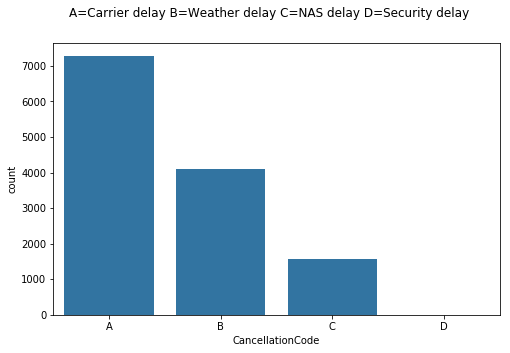

In [19]:
plt.figure(figsize = [8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'CancellationCode', color = base_color);
plt.suptitle('A=Carrier delay B=Weather delay C=NAS delay D=Security delay')
plt.show()

## Distribution of Carrier delay

 The cause of the delay was due to circumstances within the airline's control. Carrier Delay of most of the flights falls in the range 1-300 minutes

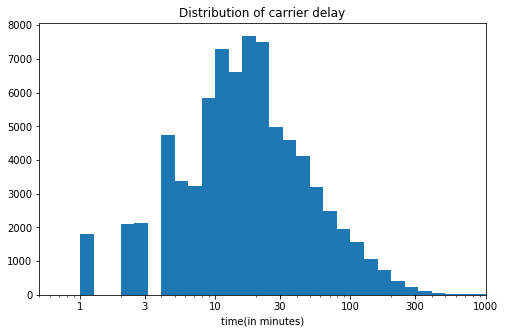

In [20]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['CarrierDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'CarrierDelay', bins = bins)
plt.title('Distribution of carrier delay')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time(in minutes)')
plt.xlim((0.5,1000))
plt.show()

## Distribution of weather delay

Delay caused due to weather conditions. Weather delay falls in the same range as that of carrier delay which is 1-300 minutes.

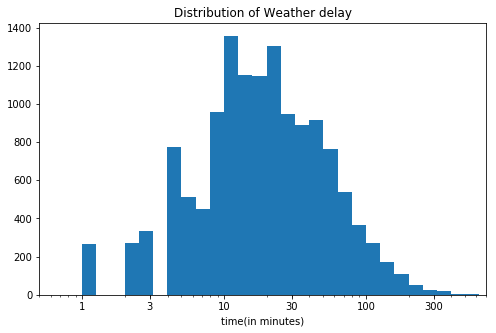

In [21]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['WeatherDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'WeatherDelay', bins = bins)
plt.title('Distribution of Weather delay')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time(in minutes)')
plt.xlim((0.5,700))
plt.show()

## (Visualization 2)

> Plotting unique carrier against Cancellation code which carrier had the most flights cancelled for various reasons.

> A= Carrier delay, B= Weather delay, C= NAS delay, D= Security delay.

> WN= Southwest international airport, DL= Delta airlines, F9= Jetblue's airlines, AA= American airlines, UA= United airlines

> AA has the most flights cancelled due to carreir delay and weather delay and F9 with the least canelled flights.


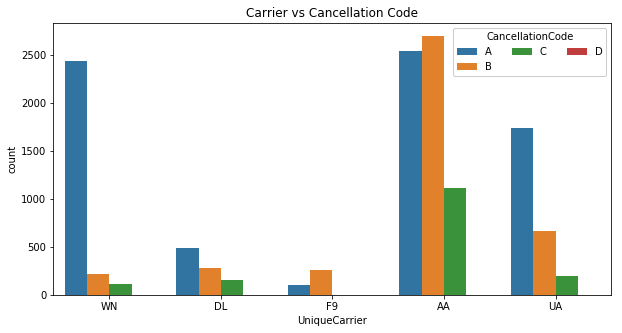

In [22]:
plt.figure(figsize= [10,5])
ax=sb.countplot(data = result, x = 'UniqueCarrier', hue = 'CancellationCode')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'CancellationCode');
plt.title('Carrier vs Cancellation Code');

## Departure delay for the unique carriers at the oirgin airports.

> In the plot light colors indicate high departure delay values. We can see from the plot that AA (American Airlines) and UA(United Airlines) at the origin airport ORD(O'Hare international airport) has the highest departure delay.

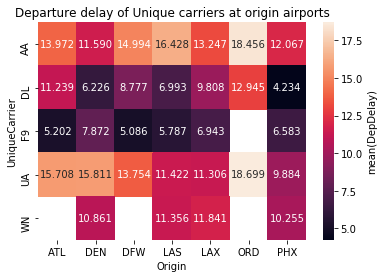

In [23]:
cat_means = result.groupby(['Origin', 'UniqueCarrier']).mean()['DepDelay']
cat_means = cat_means.reset_index(name = 'DepDelay_avg')
cat_means = cat_means.pivot(index = 'UniqueCarrier', columns = 'Origin',
                            values = 'DepDelay_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DepDelay)'});
plt.title('Departure delay of Unique carriers at origin airports');

## Correlation plot between Delay variables

> This correlation plot shows how departure correlates to delay reasons. From the plot darker colors represent strong correlation, A correlation of 0.60 between departure delay and carrier delay exists. Which is only second highest correlation for departure delay with the delay types. For cancellation of most of the flights carrier delay is the major reason. 

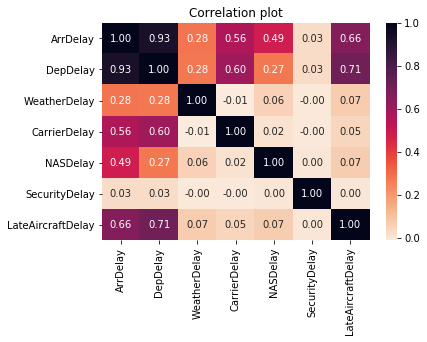

In [24]:
Delays = ['ArrDelay', 'DepDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay']
sb.heatmap(result[Delays].corr(), cmap = 'rocket_r', annot = True, fmt ='.2f');
plt.title('Correlation plot');

In [25]:
> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

SyntaxError: invalid syntax (<ipython-input-25-6539ab828ac2>, line 1)